In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use("plot_style.txt")

In [2]:
df_kasus1 = pd.read_csv("dataset/2020_ID_Region_Mobility_Report.csv")
df_kasus2 = pd.read_csv("dataset/2021_ID_Region_Mobility_Report.csv")
df_kasus = pd.concat([df_kasus1, df_kasus2])
df_kasus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 7979
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 19215 non-null  object 
 1   country_region                                      19215 non-null  object 
 2   sub_region_1                                        18666 non-null  object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     18666 non-null  object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            19215 non-null  object 
 8   date                                                19215 non-null  object 
 

In [7]:
df_kasus.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2020-02-15,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-15,-2.0,-2.0,-8.0,1.0,5,1
2020-02-16,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-16,-3.0,-3.0,-7.0,-4.0,2,2
2020-02-17,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-17,-3.0,-4.0,-7.0,-1.0,3,1
2020-02-18,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-18,-3.0,-2.0,-4.0,1.0,2,1
2020-02-19,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-19,-3.0,-4.0,-3.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-08-12,9.0,42.0,-41.0,-22.0,-21,5
2021-08-13,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-08-13,3.0,38.0,-41.0,-29.0,-18,6
2021-08-14,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2021-08-14,-7.0,22.0,-53.0,-37.0,-20,8


In [4]:
df_kasus.index = pd.to_datetime(df_kasus["date"])
df_kasus_clean = df_kasus.iloc[:, 9:]
df_kasus_clean = df_kasus_clean.astype("float64")
df_kasus_clean = df_kasus_clean.rename(columns={
    df_kasus_clean.columns[0]: "retail_recreation",
    df_kasus_clean.columns[1]: "grocery_pharmacy",
    df_kasus_clean.columns[2]: "parks",
    df_kasus_clean.columns[3]: "transit_stations",
    df_kasus_clean.columns[4]: "workplaces",
    df_kasus_clean.columns[5]: "residential"
})
df_kasus_clean["mean"] = df_kasus_clean.mean(axis=1)
df_kasus_clean.tail()

,retail_recreation,grocery_pharmacy,parks,transit_stations,workplaces,residential,mean
date,,,,,,,
2020-02-15,-2.0,-2.0,-8.0,1.0,5.0,1.0,-0.833333
2020-02-16,-3.0,-3.0,-7.0,-4.0,2.0,2.0,-2.166667
2020-02-17,-3.0,-4.0,-7.0,-1.0,3.0,1.0,-1.833333
2020-02-18,-3.0,-2.0,-4.0,1.0,2.0,1.0,-0.833333
2020-02-19,-3.0,-4.0,-3.0,0.0,1.0,1.0,-1.333333


In [8]:
df_kasus_clean.tail()

,retail_recreation,grocery_pharmacy,parks,transit_stations,workplaces,residential,mean
date,,,,,,,
2021-08-12,9.0,42.0,-41.0,-22.0,-21.0,5.0,-4.666667
2021-08-13,3.0,38.0,-41.0,-29.0,-18.0,6.0,-6.833333
2021-08-14,-7.0,22.0,-53.0,-37.0,-20.0,8.0,-14.500000
2021-08-15,-3.0,34.0,-48.0,-34.0,-5.0,6.0,-8.333333
2021-08-16,5.0,39.0,-40.0,-28.0,-23.0,5.0,-7.000000


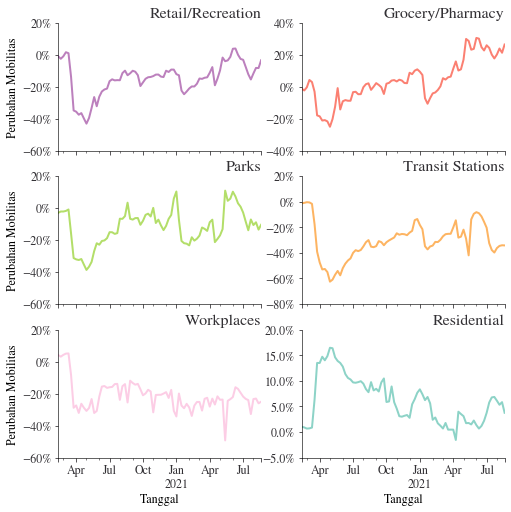

In [5]:
axes = df_kasus_clean.iloc[:, :-1].resample("W").mean().plot(
    subplots=True,
    layout=(3, 2),
    figsize=(8, 8),
    legend=False,
    title=["Retail/Recreation", "Grocery/Pharmacy", "Parks", "Transit Stations", "Workplaces", "Residential"],
    xlabel="Tanggal",
    ylabel="Perubahan Mobilitas"
)

for i, ax in enumerate(axes.ravel()):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    if (i % 2 != 0):
        ax.axes.yaxis.set_label_text('')

Text(0, 0.5, 'Jumlah Kasus')

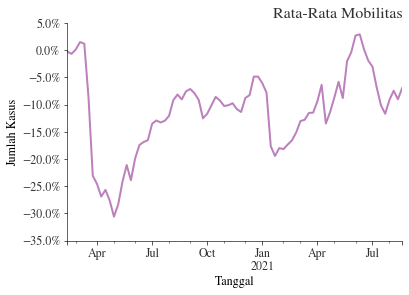

In [6]:
fig, ax = plt.subplots()
df_kasus_clean["mean"].resample("W").mean().plot(ax=ax, title="Rata-Rata Mobilitas")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")